In [5]:
import pandas as pd
import yfinance as yf
import requests


In [7]:
sp500 = yf.Ticker("^GSPC").history(period ='max')
sp500

YFRateLimitError: Too Many Requests. Rate limited. Try after a while.

In [ ]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24391 entries, 1927-12-30 00:00:00-05:00 to 2025-02-06 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          24391 non-null  float64
 1   High          24391 non-null  float64
 2   Low           24391 non-null  float64
 3   Close         24391 non-null  float64
 4   Volume        24391 non-null  int64  
 5   Dividends     24391 non-null  float64
 6   Stock Splits  24391 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.5 MB


## DATA PREPROCESSING

In [ ]:
#These columns only have a 0 value
sp500['Stock Splits'].value_counts()
sp500['Dividends'].value_counts()
#So we can delete them
sp500= sp500.drop(columns = ['Dividends', 'Stock Splits'])

<Axes: xlabel='Date'>

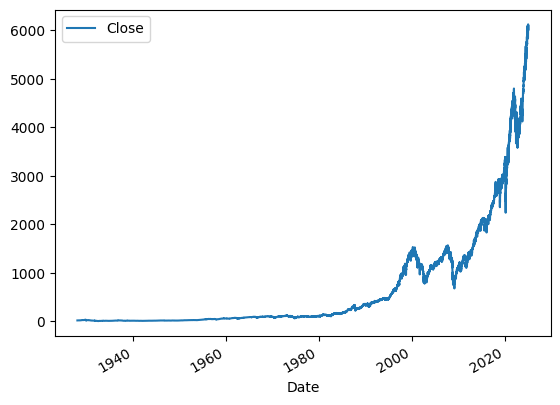

In [ ]:
sp500.plot.line(y = 'Close', use_index=True)

In [ ]:
# nothing is going on until around 1995 so we keep everything after it
sp500 = sp500.loc['1995-01-01':].copy()
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1995-01-03 00:00:00-05:00,459.209991,459.269989,457.200012,459.109985,262450000
1995-01-04 00:00:00-05:00,459.130005,460.720001,457.559998,460.709991,319510000
1995-01-05 00:00:00-05:00,460.730011,461.299988,459.750000,460.339996,309050000
1995-01-06 00:00:00-05:00,460.380005,462.489990,459.470001,460.679993,308070000
1995-01-09 00:00:00-05:00,460.670013,461.769989,459.739990,460.829987,278790000
...,...,...,...,...,...
2025-01-31 00:00:00-05:00,6096.790039,6120.910156,6030.930176,6040.529785,4843770000
2025-02-03 00:00:00-05:00,5969.649902,6022.129883,5923.930176,5994.569824,4797210000
2025-02-04 00:00:00-05:00,5998.140137,6042.479980,5990.870117,6037.879883,4410160000


In [ ]:
# Create a new column 'Tomorrow' that contains the closing price of the next day
# by shifting the 'Close' column up by one row (-1).
sp500['Tomorrow'] = sp500['Close'].shift(-1)
#create a target, 1 if the price tomorrow is higher than today
sp500['Target'] = (sp500['Tomorrow']>sp500['Close']).astype(int)
sp500


,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1995-01-03 00:00:00-05:00,459.209991,459.269989,457.200012,459.109985,262450000,460.709991,1
1995-01-04 00:00:00-05:00,459.130005,460.720001,457.559998,460.709991,319510000,460.339996,0
1995-01-05 00:00:00-05:00,460.730011,461.299988,459.750000,460.339996,309050000,460.679993,1
1995-01-06 00:00:00-05:00,460.380005,462.489990,459.470001,460.679993,308070000,460.829987,1
1995-01-09 00:00:00-05:00,460.670013,461.769989,459.739990,460.829987,278790000,461.679993,1
...,...,...,...,...,...,...,...
2025-01-31 00:00:00-05:00,6096.790039,6120.910156,6030.930176,6040.529785,4843770000,5994.569824,0
2025-02-03 00:00:00-05:00,5969.649902,6022.129883,5923.930176,5994.569824,4797210000,6037.879883,1
2025-02-04 00:00:00-05:00,5998.140137,6042.479980,5990.870117,6037.879883,4410160000,6061.479980,1


In [ ]:
import pandas as pd
import requests
from io import StringIO

url = "https://fred.stlouisfed.org/graph/fredgraph.csv?id=DFF"
response = requests.get(url, verify=True)  # Ensure SSL verification

if response.status_code == 200:
    data = StringIO(response.text)
    federal_rates = pd.read_csv(data)
    federal_rates['Date'] = pd.to_datetime(federal_rates['observation_date'], format='%Y-%m-%d')
    print(federal_rates.info())
else:
    print(f"Failed to download data: {response.status_code}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25788 entries, 0 to 25787
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  25788 non-null  object        
 1   DFF               25788 non-null  float64       
 2   Date              25788 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 604.5+ KB
None


In [ ]:
# Average of the last 4 rows for the 'DFF' column
average_dff = federal_rates['DFF'].tail(4).mean()

# Get the last date and add one day
next_day_date = federal_rates['Date'].iloc[-1] + pd.Timedelta(days=1)

# Check if the next day is Saturday or Sunday, and adjust to Monday if needed
if next_day_date.weekday() == 5:  # Saturday
    next_day_date += pd.Timedelta(days=2)  # Move to Monday
elif next_day_date.weekday() == 6:  # Sunday
    next_day_date += pd.Timedelta(days=1)  # Move to Monday

# Create a new row dictionary
next_day_row = {
    'Date': next_day_date,
    'DFF': average_dff  # Use the computed average for the 'DFF' column
}

# Append the new row to the DataFrame
federal_rates = pd.concat([federal_rates, pd.DataFrame([next_day_row]) ], ignore_index=True)

# Show the updated DataFrame
print(federal_rates.tail())

      observation_date   DFF       Date
25784       2025-02-02  4.33 2025-02-02
25785       2025-02-03  4.33 2025-02-03
25786       2025-02-04  4.33 2025-02-04
25787       2025-02-05  4.33 2025-02-05
25788              NaN  4.33 2025-02-06


In [ ]:
# Remove the timezone from sp500['Date']
sp500 = sp500.reset_index()
sp500['Date'] = sp500['Date'].dt.tz_localize(None)

# Now perform the merge
sp500_with_rates = pd.merge(sp500, federal_rates, on='Date')
sp500_with_rates.drop(columns=['observation_date'],inplace = True)
sp500 = sp500_with_rates


In [ ]:
sp500
sp500.set_index('Date', inplace=True)

In [ ]:
# Define different time windows for calculating features
days = [2, 7, 30, 90, 365]
features = []

# Create new feature columns based on rolling averages and trends
for day in days:
    # Calculate rolling averages for the specified window
    rolling_averages = sp500.rolling(day).mean()

    # Create a feature for the ratio of the current Close price to its rolling average
    ratio_close_column = f"Close_Ratio_{day}"
    sp500[ratio_close_column] = sp500['Close'] / rolling_averages['Close']

    # Create a feature for the market trend based on the sum of previous Target values
    trend_column = f"Trend_{day}"
    sp500[trend_column] = sp500.shift(1).rolling(day).sum()['Target']

    # Create a feature for the ratio of the current DFF to its rolling average
    ratio_DFF_column = f"DFF_ratio_{day}"
    sp500[ratio_DFF_column] = sp500['DFF'] / rolling_averages['DFF']

    # Add the created features to the list of features
    features += [ratio_close_column, trend_column, ratio_DFF_column]


# Save the last row of the DataFrame before dropping it, this wil be the input for prediction at the end of the code
row_to_predict = sp500.tail(1)

# Drop rows with missing values
sp500.dropna(inplace=True)

sp500


,Open,High,Low,Close,Volume,Tomorrow,Target,DFF,Close_Ratio_2,Trend_2,...,DFF_ratio_7,Close_Ratio_30,Trend_30,DFF_ratio_30,Close_Ratio_90,Trend_90,DFF_ratio_90,Close_Ratio_365,Trend_365,DFF_ratio_365
Date,,,,,,,,,,,,,,,,,,,,,
1996-06-12,670.969971,673.669983,668.770020,669.039978,397190000,667.919983,0,5.25,0.998560,0.0,...,0.997557,1.007375,14.0,0.995764,1.023693,49.0,0.995135,1.164710,219.0,0.921957
1996-06-13,669.039978,670.539978,665.489990,667.919983,397620000,665.849976,0,5.27,0.999162,0.0,...,1.000271,1.005016,13.0,1.000443,1.021519,48.0,0.998842,1.161612,218.0,0.926057
1996-06-14,667.919983,668.400024,664.349976,665.849976,390630000,665.159973,0,5.30,0.998448,0.0,...,1.007058,1.000773,13.0,1.006011,1.018015,47.0,1.004232,1.156879,218.0,0.931517
1996-06-17,665.849976,668.270020,664.090027,665.159973,298410000,662.059998,0,5.47,0.999482,0.0,...,1.034306,0.998559,13.0,1.036116,1.016697,46.0,1.035702,1.154556,217.0,0.961419
1996-06-18,665.159973,666.359985,661.340027,662.059998,373290000,661.960022,0,5.27,0.997664,0.0,...,0.994876,0.992849,13.0,0.998169,1.011856,45.0,0.997644,1.148077,216.0,0.926378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-30,6050.750000,6086.640137,6027.459961,6071.169922,4634620000,6040.529785,0,4.33,1.002631,1.0,...,1.000000,1.016630,16.0,0.994259,1.027613,51.0,0.940850,1.166528,210.0,0.840911
2025-01-31,6096.790039,6120.910156,6030.930176,6040.529785,4843770000,5994.569824,0,4.33,0.997470,1.0,...,1.000000,1.011689,15.0,0.996166,1.021777,51.0,0.941987,1.159621,210.0,0.841359
2025-02-03,5969.649902,6022.129883,5923.930176,5994.569824,4797210000,6037.879883,1,4.33,0.996181,0.0,...,1.000000,1.004306,15.0,0.998079,1.013477,50.0,0.943127,1.149815,210.0,0.841807


## MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,accuracy_score, classification_report


# Define and train the model
model = RandomForestClassifier(n_estimators=150, min_samples_split=50, max_depth = 15 , random_state=1)

train = sp500.iloc[:-550]
test = sp500.iloc[-550:]

# Train the model
model.fit(train[features], train['Target'])

# Predict probabilities for the test set, and only the rows greater than 0.6 will be 1
probs = model.predict_proba(test[features])[:, 1]
threshold = 0.60
preds = (probs >= threshold).astype(int)


## RESULTS AND METRICS

In [ ]:
precision = precision_score(test['Target'], preds)
# Print precision
print(f"Precision Score: {precision:.4f}")  #0.7778

Precision Score: 0.7273


## PREDICTING TOMORROW OUTCOME

In [ ]:
# calling again the previously saved last row
row_to_predict[features]

,Close_Ratio_2,Trend_2,DFF_ratio_2,Close_Ratio_7,Trend_7,DFF_ratio_7,Close_Ratio_30,Trend_30,DFF_ratio_30,Close_Ratio_90,Trend_90,DFF_ratio_90,Close_Ratio_365,Trend_365,DFF_ratio_365
Date,,,,,,,,,,,,,,,
2025-02-06,1.001819,2.0,1.0,1.006059,4.0,1.0,1.016306,17.0,1.0,1.02663,51.0,0.946563,1.163853,211.0,0.843154


In [ ]:
# Make a prediction for the next day's market movement
prediction = model.predict(row_to_predict[features])

# Display the prediction
print(f"Predicted market movement for tomorrow: {'It will INCREASE' if prediction[0] == 1 else 'It will DECREASE'}")


Predicted market movement for tomorrow: It will INCREASE
